In [1]:
from wordcloud import WordCloud, STOPWORDS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('nike_data_2022_09.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            112 non-null    int64  
 1   url              112 non-null    object 
 2   name             112 non-null    object 
 3   sub_title        112 non-null    object 
 4   brand            112 non-null    object 
 5   model            112 non-null    int64  
 6   color            110 non-null    object 
 7   price            112 non-null    float64
 8   currency         112 non-null    object 
 9   availability     108 non-null    object 
 10  description      112 non-null    object 
 11  raw_description  112 non-null    object 
 12  avg_rating       23 non-null     float64
 13  review_count     23 non-null     float64
 14  images           108 non-null    object 
 15  available_sizes  56 non-null     object 
 16  uniq_id          112 non-null    object 
 17  scraped_at      

In [5]:
data['color'].value_counts()

Black                        15
White                         9
Navy                          3
Black/White                   3
Multi-Color                   3
                             ..
Charcoal Heather/Red          1
Black/Black/Black             1
Black/Black                   1
Multi-Color/Lavender Mist     1
Orange                        1
Name: color, Length: 76, dtype: int64

<AxesSubplot:xlabel='avg_rating'>

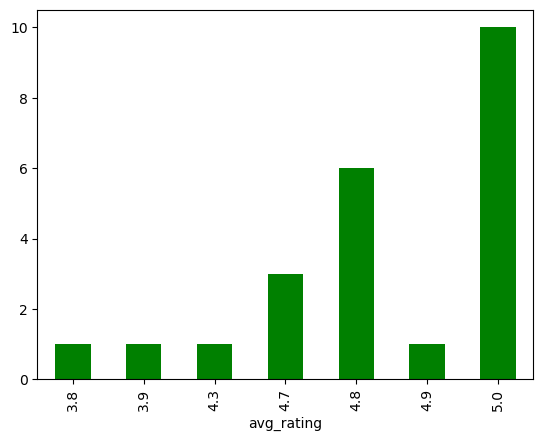

In [6]:
data.groupby('avg_rating').price.count().plot(kind='bar',color='green')

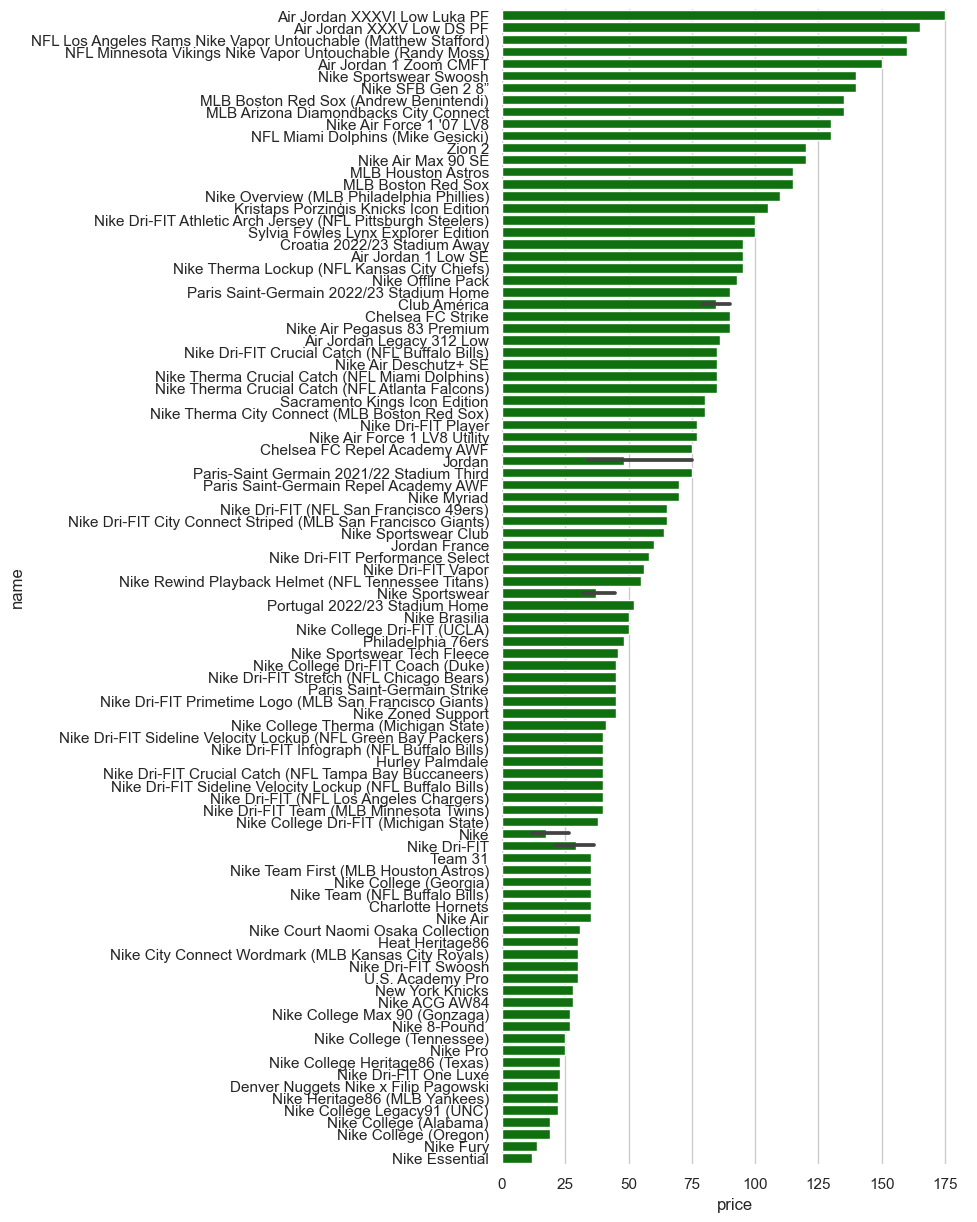

In [7]:
df_sorted=data.sort_values("price", ascending=False)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="name", data=df_sorted,
            label="Price of nike", color="green")
sns.despine(left=True, bottom=True)

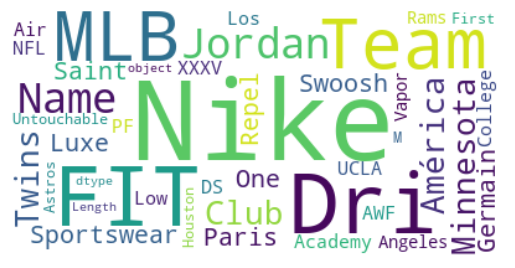

In [8]:
df=data.copy()
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    
    stopwords=STOPWORDS
)


# generate the word cloud
alice_wc.generate(str(df['name']))
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
df2=df[['price','availability','avg_rating','review_count']]

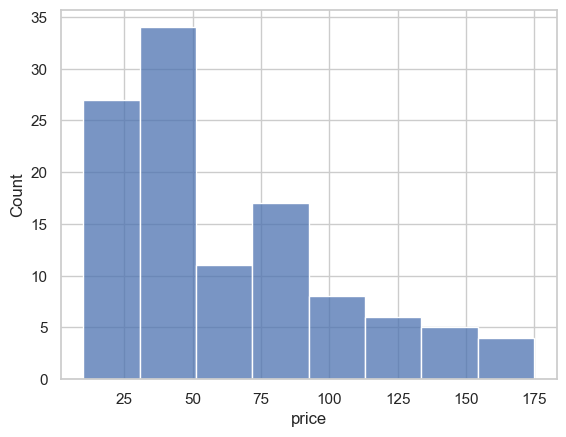

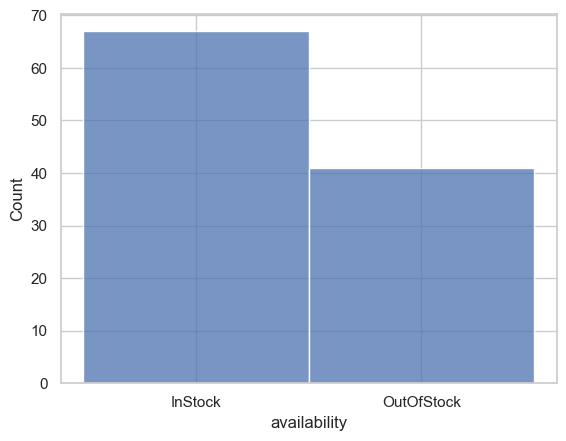

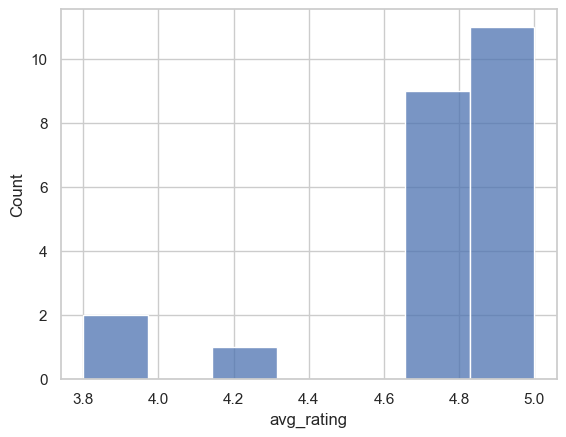

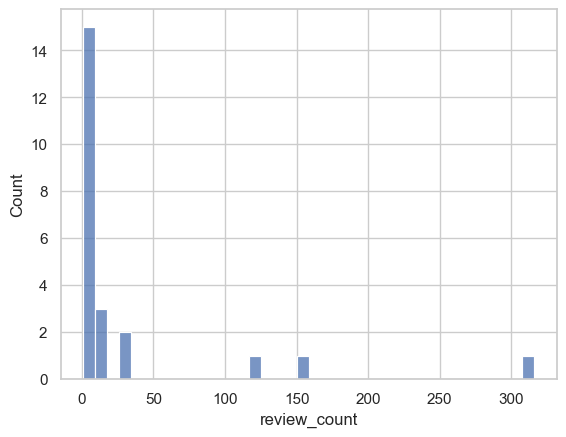

In [10]:
for column in df2.columns:
    
    sns.histplot(df2[column])
    plt.show()



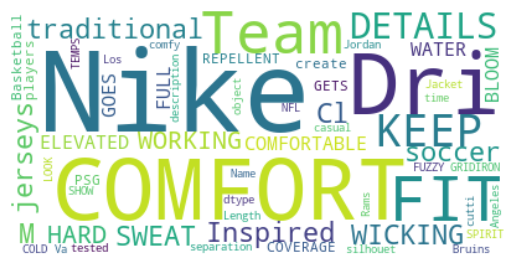

In [11]:
df3=df[['description']]

    
    # instantiate a word cloud object
alice_wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=STOPWORDS
    )
for column in df3.columns:
    # generate the word cloud
    alice_wc.generate(str(df[column]))
    # display the word cloud
    plt.imshow(alice_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

<AxesSubplot:>

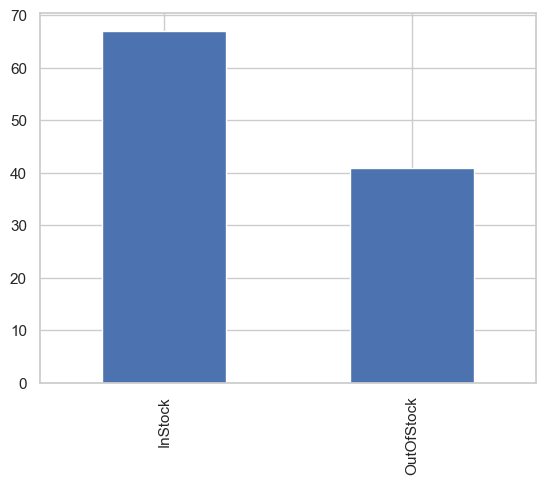

In [24]:
df['availability'].value_counts().plot(kind='bar')

In [ ]:
data